In [ ]:
#Question 2b

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
def getScalarEncoding(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    new_cat_features = enc.transform(cat_features)
    return new_cat_features

In [6]:
features = pd.read_csv('network_backup_dataset.csv')
features.head(5)
features_matrix = features.iloc[:, [0, 1, 2, 3, 4]].values

In [7]:
features_data=features.as_matrix()

In [71]:
feature_list = list(features.columns)[0:5]
print feature_list

['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']


In [11]:
labels = np.array(features['Size of Backup (GB)'])
print labels

[ 0.          0.          0.         ...,  0.19857244  0.19957007
  0.20120052]


In [17]:
for i in range(0,5,1):
    print "i=",i
    features_matrix[:,i]=getScalarEncoding(features_data[:, i])

i= 0
i= 1
i= 2
i= 3
i= 4


In [97]:
def performRegression(rf):
    RMSE_train=[]
    RMSE_test=[]
    dataPoints=[]
    predictions=[]
    actual=[]
    residual=[]
    
    for train_index, test_index in kf.split(features_matrix):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = features_matrix[train_index], features_matrix[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        rf.fit(X_train, y_train)
        
        predicted_test = rf.predict(X_test)
        RMSE_test.append(mse(y_test, predicted_test))
        #RMSE_test.append(np.sqrt(np.sum((predicted_test - y_test)**2)/y_test.size))

        predicted_train = rf.predict(X_train)
        RMSE_train.append(mse(y_train, predicted_train))
        #RMSE_train.append(np.sqrt(np.sum((predicted_train - y_train)**2)/y_train.size))
        
        dataPoints.append(test_index)
        predictions.append(predicted_test)
        actual.append(y_test)
        residual.append(predicted_test-y_test)
    
    dp = [item for sublist in dataPoints for item in sublist]
    pred = [item for sublist in predictions for item in sublist]
    act = [item for sublist in actual for item in sublist]
    res = [item for sublist in residual for item in sublist]
    
    print "act="
    plt.scatter(dp, pred)
    plt.scatter(dp,act)
    plt.xlabel("Datapoints")
    plt.ylabel("Actual & Fitted Values")
    plt.title('Actual and Fitted v/s Data Points')
    plt.legend(['Fitted','Actual'])
    plt.show()
    plt.close()
    
    plt.scatter(dp, pred)
    plt.scatter(dp, res)
    plt.xlabel("Datapoints")
    plt.ylabel("Residual & Fitted Values")
    plt.title('Residual & Fitted values vs Data Points')
    plt.legend(['Fitted','Residual'])
    plt.show()
    plt.close()
    
    print "######################################################"
    
    act1=np.asarray(act)
    pred1=np.asarray(pred)
    res1=np.asarray(res)
    
    plt.scatter(x=act1, y=pred1,s=1)
    plt.plot([act1.min(), act1.max()], [act1.min(), act1.max()],  'k--', lw=5)
    plt.xlabel('Actual')
    plt.ylabel('Fitted')
    plt.title("Fitted v/s Actual Values")
    plt.show()
    plt.close()
    
    plt.scatter(x=pred1, y=res1,s=1)
    plt.plot([pred1.min(), pred1.max()], [pred1.min(), pred1.max()],  'k--', lw=5)
    plt.xlabel('Fitted')
    plt.ylabel('Residual')
    plt.title("Residual v/s Fitted Values")
    plt.show()
    plt.close()   
    
    print "######################################################"

    print "Out of bag score =",round(1-rf.oob_score_,5)
    #print "Mean training RMSE=",sum(RMSE_train)/10
    #print "Mean testing RMSE=",sum(RMSE_test)/10
    print "Mean training RMSE=", round(math.sqrt(np.mean(RMSE_train)),5)
    print "Mean testing RMSE=", round(math.sqrt(np.mean(RMSE_test)),5)
    return round(1-rf.oob_score_,5), round(math.sqrt(np.mean(RMSE_test)),5)

KFold(n_splits=10, random_state=None, shuffle=False)
act=


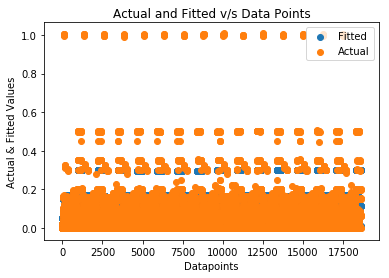

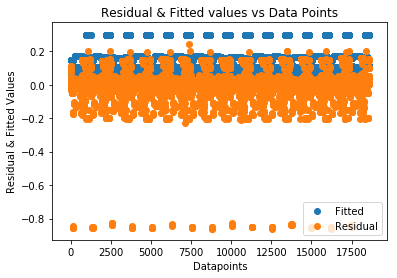

######################################################


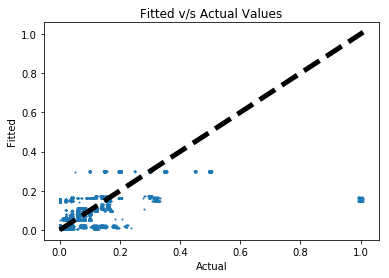

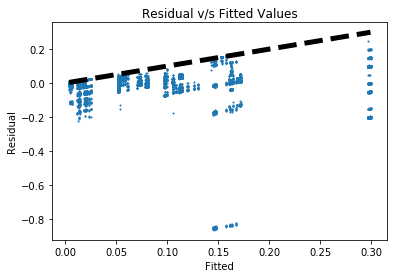

######################################################
Out of bag score = 0.5408
Mean training RMSE= 0.07595
Mean testing RMSE= 0.07618


In [98]:
kf = KFold(n_splits=10)
kf.get_n_splits(features_matrix)
print(kf)

rf = RandomForestRegressor(n_estimators = 20, max_features=5, max_depth=4, random_state = 42, oob_score=True)
oob, testRMSE = performRegression(rf)

In [33]:
#Varying number of trees and max_features
treeList=[1,5,10,20,30,40,50,100,150,200]
maxFeatureList=[1,2,3,4,5]
list1_oob=[]
list1_rmse=[]
list2_oob=[]
list2_rmse=[]
list3_oob=[]
list3_rmse=[]
list4_oob=[]
list4_rmse=[]
list5_oob=[]
list5_rmse=[]

for tree in treeList:
    for feature in maxFeatureList:
        rf = RandomForestRegressor(n_estimators = tree, max_features=feature, max_depth=4, random_state = 42, oob_score=True)
        print ".............Performing regression for max_features=", feature, " and trees= ", tree,".............."
        oob, testRMSE = performRegression(rf)
        if feature == 1:
            list1_oob.append(oob)
            list1_rmse.append(testRMSE)
        elif feature == 2:
            list2_oob.append(oob)
            list2_rmse.append(testRMSE)
        elif feature == 3:
            list3_oob.append(oob)
            list3_rmse.append(testRMSE)
        elif feature == 4:
            list4_oob.append(oob)
            list4_rmse.append(testRMSE)
        else:
            list5_oob.append(oob)
            list5_rmse.append(testRMSE)

.............Performing regression for max_features= 1  and trees=  1 ..............
Out of bag score = 1.15127
Mean training RMSE= 0.09443
Mean testing RMSE= 0.09491
.............Performing regression for max_features= 2  and trees=  1 ..............
Out of bag score = 1.13703
Mean training RMSE= 0.08882
Mean testing RMSE= 0.08892
.............Performing regression for max_features= 3  and trees=  1 ..............
Out of bag score = 1.07337
Mean training RMSE= 0.07844
Mean testing RMSE= 0.07875
.............Performing regression for max_features= 4  and trees=  1 ..............
Out of bag score = 1.06527
Mean training RMSE= 0.0764
Mean testing RMSE= 0.07671
.............Performing regression for max_features= 5  and trees=  1 ..............
Out of bag score = 1.06502
Mean training RMSE= 0.07635
Mean testing RMSE= 0.07666
.............Performing regression for max_features= 1  and trees=  5 ..............
Out of bag score = 0.8449
Mean training RMSE= 0.08948
Mean testing RMSE= 0.08965


Out of bag score = 0.53192
Mean training RMSE= 0.07588
Mean testing RMSE= 0.07612


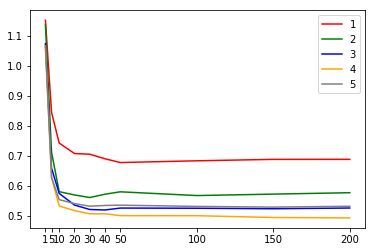

In [34]:
plt.plot(treeList, list1_oob, 'r')
plt.plot(treeList, list2_oob, 'g')
plt.plot(treeList, list3_oob, 'b')
plt.plot(treeList, list4_oob, color='orange')
plt.plot(treeList, list5_oob, color='gray')
plt.xlabel("Number of Trees")
plt.ylabel("Out of bag error")
plt.title('Figure 1: Out-of-bag error v/s Number of Trees')
plt.legend(['1','2','3','4','5'])
plt.xticks(treeList)
plt.show()
plt.close()

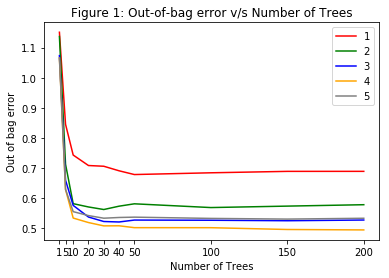

In [81]:
plt.plot(treeList, list1_oob, 'r')
plt.plot(treeList, list2_oob, 'g')
plt.plot(treeList, list3_oob, 'b')
plt.plot(treeList, list4_oob, color='orange')
plt.plot(treeList, list5_oob, color='gray')
plt.xlabel("Number of Trees")
plt.ylabel("Out of bag error")
plt.title('Figure 1: Out-of-bag error v/s Number of Trees')
plt.legend(['1','2','3','4','5'])
plt.xticks(treeList)
plt.show()
plt.close()

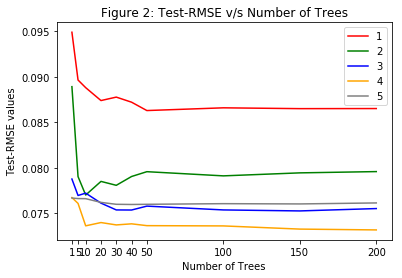

In [83]:
plt.plot(treeList, list1_rmse, 'r')
plt.plot(treeList, list2_rmse, 'g')
plt.plot(treeList, list3_rmse, 'b')
plt.plot(treeList, list4_rmse, color='orange')
plt.plot(treeList, list5_rmse, color='gray')
plt.legend(['1','2','3','4','5'])
plt.xlabel("Number of Trees")
plt.ylabel("Test-RMSE values")
plt.title('Figure 2: Test-RMSE v/s Number of Trees')
plt.xticks(treeList)
plt.show()
plt.close()

In [59]:
depthList=[4,6,8,10,15,20]
dList1_oob=[]
dList1_rmse=[]
dList2_oob=[]
dList2_rmse=[]
dList3_oob=[]
dList3_rmse=[]
dList4_oob=[]
dList4_rmse=[]
dList5_oob=[]
dList5_rmse=[]

for depth in depthList:
    for feature in maxFeatureList:
        rf = RandomForestRegressor(n_estimators = 50, max_features=feature, max_depth=depth, random_state = 42, oob_score=True)
        print ".............Performing regression for max_features=", feature, " and depth= ", depth,".............."
        oob, testRMSE = performRegression(rf)
        if feature == 1:
            dList1_oob.append(oob)
            dList1_rmse.append(testRMSE)
        elif feature == 2:
            dList2_oob.append(oob)
            dList2_rmse.append(testRMSE)
        elif feature == 3:
            dList3_oob.append(oob)
            dList3_rmse.append(testRMSE)
        elif feature == 4:
            dList4_oob.append(oob)
            dList4_rmse.append(testRMSE)
        else:
            dList5_oob.append(oob)
            dList5_rmse.append(testRMSE)

.............Performing regression for max_features= 1  and depth=  4 ..............
Out of bag score = 0.67746
Mean training RMSE= 0.0856
Mean testing RMSE= 0.08629
.............Performing regression for max_features= 2  and depth=  4 ..............
Out of bag score = 0.58002
Mean training RMSE= 0.07899
Mean testing RMSE= 0.07956
.............Performing regression for max_features= 3  and depth=  4 ..............
Out of bag score = 0.52591
Mean training RMSE= 0.07524
Mean testing RMSE= 0.07577
.............Performing regression for max_features= 4  and depth=  4 ..............
Out of bag score = 0.50061
Mean training RMSE= 0.07341
Mean testing RMSE= 0.07362
.............Performing regression for max_features= 5  and depth=  4 ..............
Out of bag score = 0.53561
Mean training RMSE= 0.07575
Mean testing RMSE= 0.07597
.............Performing regression for max_features= 1  and depth=  6 ..............
Out of bag score = 0.47492
Mean training RMSE= 0.07232
Mean testing RMSE= 0.07506

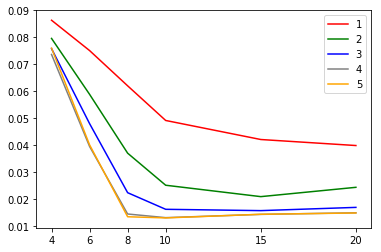

In [60]:
plt.plot(depthList, dList1_rmse, 'r')
plt.plot(depthList, dList2_rmse, 'g')
plt.plot(depthList, dList3_rmse, 'b')
plt.plot(depthList, dList4_rmse, color='gray')
plt.plot(depthList, dList5_rmse, color='orange')
plt.legend(['1','2','3','4','5'])
plt.xticks(depthList)
plt.show()
plt.close()

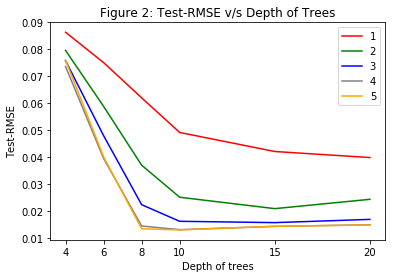

In [85]:
plt.plot(depthList, dList1_rmse, 'r')
plt.plot(depthList, dList2_rmse, 'g')
plt.plot(depthList, dList3_rmse, 'b')
plt.plot(depthList, dList4_rmse, color='gray')
plt.plot(depthList, dList5_rmse, color='orange')
plt.legend(['1','2','3','4','5'])
plt.xlabel("Depth of trees")
plt.ylabel("Test-RMSE")
plt.title('Figure 2: Test-RMSE v/s Depth of Trees')
plt.xticks(depthList)
plt.show()
plt.close()

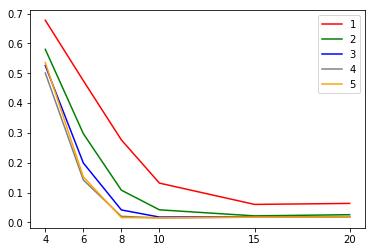

In [61]:
plt.plot(depthList, dList1_oob, 'r')
plt.plot(depthList, dList2_oob, 'g')
plt.plot(depthList, dList3_oob, 'b')
plt.plot(depthList, dList4_oob, color='orange')
plt.plot(depthList, dList5_oob, color='gray')
plt.legend(['1','2','3','4','5'])
plt.xticks(depthList)
plt.show()
plt.close()

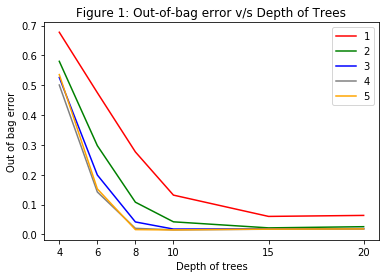

In [84]:
plt.plot(depthList, dList1_oob, 'r')
plt.plot(depthList, dList2_oob, 'g')
plt.plot(depthList, dList3_oob, 'b')
plt.plot(depthList, dList4_oob, color='gray')
plt.plot(depthList, dList5_oob, color='orange')
plt.xlabel("Depth of trees")
plt.ylabel("Out of bag error")
plt.title('Figure 1: Out-of-bag error v/s Depth of Trees')
plt.legend(['1','2','3','4','5'])
plt.xticks(depthList)
plt.show()
plt.close()

act=


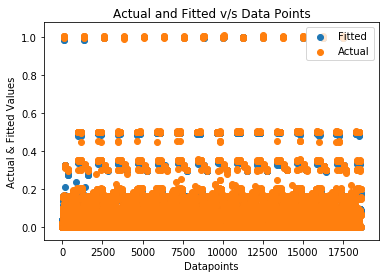

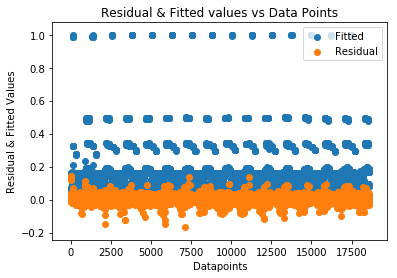

######################################################


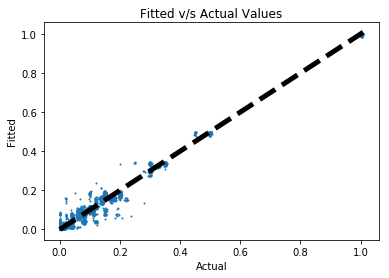

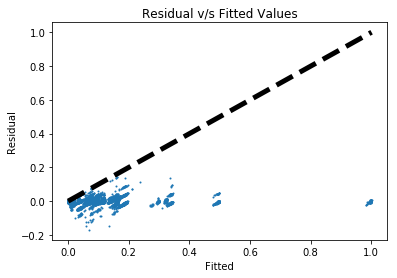

######################################################
Out of bag score = 0.01477
Mean training RMSE= 0.01115
Mean testing RMSE= 0.01307


array([ 0.00355358,  0.3469408 ,  0.33692236,  0.25030568,  0.06227758])

In [99]:
rf = RandomForestRegressor(n_estimators = 200, max_features=4, max_depth=10, random_state = 42, oob_score=True)
oob, rmsetest = performRegression(rf)
rf.feature_importances_

In [73]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot


# Pull out one tree from the forest previously created
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file through command line
#dot tree.dot -Tpng -o tree.png

In [74]:
rf = RandomForestRegressor(n_estimators = 200, max_features=4, max_depth=4, random_state = 42, oob_score=True)
oob, rmsetest = performRegression(rf)
print rf.feature_importances_

tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

Out of bag score = 0.49311
Mean training RMSE= 0.07292
Mean testing RMSE= 0.07315


In [76]:
rf.feature_importances_

array([  1.19191814e-04,   3.54656316e-01,   9.17301062e-02,
         4.55648246e-01,   9.78461403e-02])